In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
histogram_raw = np.loadtxt("subsystem_fock_state_histogram_0.000000.dat")
histogram_raw_with_swap = np.loadtxt("subsystem_fock_state_histogram_0.000000_withSWAP.dat")
histogram_raw_with_swap

array([7462., 6966., 2439., 2400., 6792.,  456.,  136.,  275.,  191.,
        520.,  218.,  278.,  215., 1629.])

In [59]:
subsystem_fock_states = ['0000','0101','0110','1001','1010','0202','0220','0211','2002','2020','2011','1102','1120','1111']

In [60]:
swappables = np.zeros_like(histogram_raw)
non_swappables = np.zeros_like(histogram_raw)

swappables_with_swap = np.zeros_like(histogram_raw_with_swap)
non_swappables_with_swap = np.zeros_like(histogram_raw_with_swap)

In [61]:
swappables[0] = histogram_raw[0]
swappables[1] = histogram_raw[1]
swappables[4] = histogram_raw[4]
swappables[5] = histogram_raw[5]
swappables[9] = histogram_raw[9]
swappables[13] = histogram_raw[13]

swappables_with_swap[0] = histogram_raw_with_swap[0]
swappables_with_swap[1] = histogram_raw_with_swap[1]
swappables_with_swap[4] = histogram_raw_with_swap[4]
swappables_with_swap[5] = histogram_raw_with_swap[5]
swappables_with_swap[9] = histogram_raw_with_swap[9]
swappables_with_swap[13] = histogram_raw_with_swap[13]

In [62]:
non_swappables[2] = histogram_raw[2]
non_swappables[3] = histogram_raw[3]
non_swappables[6] = histogram_raw[6]
non_swappables[7] = histogram_raw[7]
non_swappables[8] = histogram_raw[8]
non_swappables[10] = histogram_raw[10]
non_swappables[11] = histogram_raw[11]
non_swappables[12] = histogram_raw[12]

non_swappables_with_swap[2] = histogram_raw_with_swap[2]
non_swappables_with_swap[3] = histogram_raw_with_swap[3]
non_swappables_with_swap[6] = histogram_raw_with_swap[6]
non_swappables_with_swap[7] = histogram_raw_with_swap[7]
non_swappables_with_swap[8] = histogram_raw_with_swap[8]
non_swappables_with_swap[10] = histogram_raw_with_swap[10]
non_swappables_with_swap[11] = histogram_raw_with_swap[11]
non_swappables_with_swap[12] = histogram_raw_with_swap[12]

In [63]:
# Normalize
norm = np.sum(histogram_raw)
norm_with_swap = np.sum(histogram_raw_with_swap)

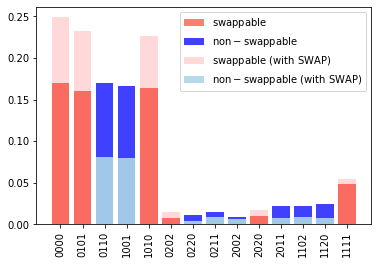

In [64]:
# plt.bar(range(len(histogram_raw)),histogram_raw,tick_label=subsystem_fock_states)
plt.bar(range(len(histogram_raw)),swappables/norm,tick_label=subsystem_fock_states,label=r'$\rm{swappable}$',color='salmon')
plt.bar(range(len(histogram_raw)),non_swappables/norm,tick_label=subsystem_fock_states,label=r'$\rm{non-swappable}$',color='blue',alpha=0.75)
plt.bar(range(len(histogram_raw)),swappables_with_swap/norm_with_swap,tick_label=subsystem_fock_states,label=r'$\rm{swappable}$ (with SWAP) ',color='red',alpha=0.15,zorder=10)
plt.bar(range(len(histogram_raw)),non_swappables_with_swap/norm_with_swap,tick_label=subsystem_fock_states,label=r'$\rm{non-swappable}$ (with SWAP)',color='lightblue',alpha=0.9,zorder=10)
plt.xticks(rotation='vertical')
plt.legend(loc='best')
plt.savefig("subsystem_fock_states_histogram_combined.pdf")

### $\langle S_2 \rangle$

In [55]:
swappable_sum = 0.333333*np.sum(swappables_with_swap)
all_column_sum = 0.333333*np.sum(swappables_with_swap) + np.sum(non_swappables_with_swap)

In [56]:
-np.log(swappable_sum/all_column_sum)

0.57360279953538

In [43]:
swappable_sum = np.sum(swappables)
all_column_sum = np.sum(swappables) + np.sum(non_swappables)

In [44]:
-np.log(swappable_sum/all_column_sum)

0.5794732360893554

In [12]:
swappable_probs = [8/32,8/32,8/32,2/32,2/32, 4/32]
sum(swappable_probs)

# THIS IS ONLY FOR ONE REPLICA

# the non-interacting system state is the tensor of both

# Do this for the replica, then do the tensor with replica and get probability of joint subsytem fock state

# Might be too many terms to do by hand. Try and do it with a script.

# Once we have these, let's get the exact histogram from the joint wavefunction

# Compare PIMC (without SWAP) with Wavefunction histogram and check they're the same

1.0

In [13]:
from math import sqrt
# Exact ground state
N = sqrt(32)
psi_coeffs = [2,sqrt(2),sqrt(2),2,2,2,2,sqrt(2),sqrt(2),2]
psi_coeffs = [i/N for i in psi_coeffs]
psi_labels = ["0011","0002","0020","0101","0110","1001","1010","2000","0200","1100"]

In [25]:
psi_labels_tensored = []
for label_i in psi_labels:
    for label_j in psi_labels:
        psi_labels_tensored.append(label_i+","+label_j)
        
psi_coeffs_tensored = []
for coeff_i in psi_coeffs:
    for coeff_j in psi_coeffs:
        psi_coeffs_tensored.append(coeff_i*coeff_j)
        
list(zip(psi_coeffs_tensored,psi_labels_tensored))

[(0.12499999999999997, '0011,0011'),
 (0.08838834764831843, '0011,0002'),
 (0.08838834764831843, '0011,0020'),
 (0.12499999999999997, '0011,0101'),
 (0.12499999999999997, '0011,0110'),
 (0.12499999999999997, '0011,1001'),
 (0.12499999999999997, '0011,1010'),
 (0.08838834764831843, '0011,2000'),
 (0.08838834764831843, '0011,0200'),
 (0.12499999999999997, '0011,1100'),
 (0.08838834764831843, '0002,0011'),
 (0.0625, '0002,0002'),
 (0.0625, '0002,0020'),
 (0.08838834764831843, '0002,0101'),
 (0.08838834764831843, '0002,0110'),
 (0.08838834764831843, '0002,1001'),
 (0.08838834764831843, '0002,1010'),
 (0.0625, '0002,2000'),
 (0.0625, '0002,0200'),
 (0.08838834764831843, '0002,1100'),
 (0.08838834764831843, '0020,0011'),
 (0.0625, '0020,0002'),
 (0.0625, '0020,0020'),
 (0.08838834764831843, '0020,0101'),
 (0.08838834764831843, '0020,0110'),
 (0.08838834764831843, '0020,1001'),
 (0.08838834764831843, '0020,1010'),
 (0.0625, '0020,2000'),
 (0.0625, '0020,0200'),
 (0.08838834764831843, '0020,11

In [15]:
# int(psi_labels_tensored[-1].split(',')[0][1])
# Keep only the labels in which the subsystems (sites 0,1) have 2 particles in each replica
indices_to_remove = []
for i,tensored_label in enumerate(psi_labels_tensored):
    n_R0 = 0
    n_R1 = 0
    
    n_R0 += int(tensored_label.split(',')[0][0])
    n_R0 += int(tensored_label.split(',')[0][1])
    
    n_R1 += int(tensored_label.split(',')[1][0])
    n_R1 += int(tensored_label.split(',')[1][1])
    
    if not(n_R0==n_R1): indices_to_remove.append(i)
    
indices_to_remove = indices_to_remove[::-1]

psi_labels_tensored_same_n_sector = psi_labels_tensored.copy()
psi_coeffs_tensored_same_n_sector = psi_coeffs_tensored.copy()

for i in indices_to_remove:
    del psi_labels_tensored_same_n_sector[i]
    del psi_coeffs_tensored_same_n_sector[i]
    
    

In [17]:
psi_labels_tensored_same_n_sector

['0011,0011',
 '0011,0002',
 '0011,0020',
 '0002,0011',
 '0002,0002',
 '0002,0020',
 '0020,0011',
 '0020,0002',
 '0020,0020',
 '0101,0101',
 '0101,0110',
 '0101,1001',
 '0101,1010',
 '0110,0101',
 '0110,0110',
 '0110,1001',
 '0110,1010',
 '1001,0101',
 '1001,0110',
 '1001,1001',
 '1001,1010',
 '1010,0101',
 '1010,0110',
 '1010,1001',
 '1010,1010',
 '2000,2000',
 '2000,0200',
 '2000,1100',
 '0200,2000',
 '0200,0200',
 '0200,1100',
 '1100,2000',
 '1100,0200',
 '1100,1100']

In [18]:
psi_coeffs_tensored_same_n_sector

[0.12499999999999997,
 0.08838834764831843,
 0.08838834764831843,
 0.08838834764831843,
 0.0625,
 0.0625,
 0.08838834764831843,
 0.0625,
 0.0625,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.12499999999999997,
 0.0625,
 0.0625,
 0.08838834764831843,
 0.0625,
 0.0625,
 0.08838834764831843,
 0.08838834764831843,
 0.08838834764831843,
 0.12499999999999997]